In [79]:
#Importing all the libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.layers import Dense
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [80]:
#Installing the Bias Detection Tool
!pip install aif360

In [81]:
#Loading the Dataset as a DataFrame
dataset = pd.read_csv('/content/loan_access_dataset.csv')

In [82]:
dataset.head(25)

ID  Gender         Race  Age Age_Group  Income  Credit_Score  Loan_Amount  \
0    1  Female        White   74   Over 60  112117           641       378691   
1    2  Female        White   36     25-60  155943           664       441856   
2    3  Female        White   27     25-60  130933           550       401760   
3    4    Male        White   67   Over 60  165816           804       159264   
4    5    Male  Multiracial   57     25-60   81510           694       256742   
5    6  Female        White   40     25-60  101975           694       140179   
6    7    Male        White   30     25-60  150379           593        74152   
7    8    Male        Asian   39     25-60   30851           693        72275   
8    9    Male        White   50     25-60  127951           735       201533   
9   10  Female        Black   33     25-60   79203           747       313757   
10  11    Male        White   34     25-60  174080           731       292404   
11  12    Male        White   55     25-60   75239           546       220274   
12  13    Male        White   78   Over 60   70622           681       358270   
13  14    Male        White   54     25-60   54208           695       337933   
14  15    Male        White   23  Under 25  160618           535       411671   
15  16  Female        White   80   Over 60   71834           590       348811   
16  17    Male     Hispanic   81   Over 60  121875           838       225615   
17  18    Male        White   32     25-60  145136           558       344364   
18  19    Male        Asian   68   Over 60   37881           729       141358   
19  20  Female        Black   33     25-60   37423           583        78057   
20  21  Female        White   24  Under 25  141034           617        66731   
21  22  Female        White   58     25-60   88804           584       290052   
22  23    Male     Hispanic   62   Over 60   36680           766       112944   
23  24  Female        White   37     25-60   90371           534       409501   
24  25    Male        White   30     25-60   71391           513        63297   

   Employment_Type Education_Level  Citizenship_Status Language_Proficiency  \
0        Full-time        Graduate             Citizen               Fluent   
1    Self-employed     High School  Permanent Resident              Limited   
2        Full-time        Graduate             Citizen               Fluent   
3              Gig    Some College             Citizen               Fluent   
4        Full-time    Some College         Visa Holder               Fluent   
5              Gig      Bachelor's             Citizen               Fluent   
6        Full-time      Bachelor's             Citizen               Fluent   
7        Full-time     High School             Citizen               Fluent   
8              Gig      Bachelor's             Citizen               Fluent   
9              Gig     High School  Permanent Resident               Fluent   
10       Full-time     High School             Citizen               Fluent   
11   Self-employed     High School             Citizen               Fluent   
12   Self-employed      Bachelor's             Citizen               Fluent   
13   Self-employed      Bachelor's             Citizen               Fluent   
14       Full-time      Bachelor's             Citizen               Fluent   
15       Full-time    Some College             Citizen               Fluent   
16       Full-time     High School             Citizen               Fluent   
17       Full-time    Some College             Citizen               Fluent   
18       Full-time     High School             Citizen               Fluent   
19       Full-time    Some College         Visa Holder               Fluent   
20       Full-time     High School         Visa Holder               Fluent   
21       Full-time    Some College             Citizen               Fluent   
22       Full-time      Bachelor's             Citizen               Fluent   
2

In [83]:
#Checking the length of the dataset
len(dataset)

10000

In [84]:
#Looking for Incomplete Data(Thankfully there werent any)
print(dataset.isnull().sum())

ID                      0
Gender                  0
Race                    0
Age                     0
Age_Group               0
Income                  0
Credit_Score            0
Loan_Amount             0
Employment_Type         0
Education_Level         0
Citizenship_Status      0
Language_Proficiency    0
Disability_Status       0
Criminal_Record         0
Zip_Code_Group          0
Loan_Approved           0
dtype: int64


ENCODING THE DATASET

In [85]:
#Encoding all the columns for training the model
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Race', 'Age_Group', 'Employment_Type', 'Education_Level', 'Citizenship_Status', 'Zip_Code_Group', 'Language_Proficiency', 'Disability_Status', 'Criminal_Record', 'Gender', 'Loan_Approved']
for column in columns_to_encode:
  le = LabelEncoder()
  dataset[column] = le.fit_transform(dataset[column])

for i in range(len(dataset)-1):
    if dataset['Loan_Approved'][i] == 0:
      dataset['Loan_Approved'][i] = 1
    else:
      dataset['Loan_Approved'][i] = 0


Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['Loan_Approved'][i] = 1
/tmp/ipython-input-85-2537161093.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assig

In [86]:
#Visualising the encoded dataset
dataset.head(25)

ID  Gender  Race  Age  Age_Group  Income  Credit_Score  Loan_Amount  \
0    1       0     5   74          1  112117           641       378691   
1    2       0     5   36          0  155943           664       441856   
2    3       0     5   27          0  130933           550       401760   
3    4       1     5   67          1  165816           804       159264   
4    5       1     3   57          0   81510           694       256742   
5    6       0     5   40          0  101975           694       140179   
6    7       1     5   30          0  150379           593        74152   
7    8       1     0   39          0   30851           693        72275   
8    9       1     5   50          0  127951           735       201533   
9   10       0     1   33          0   79203           747       313757   
10  11       1     5   34          0  174080           731       292404   
11  12       1     5   55          0   75239           546       220274   
12  13       1     5   78          1   70622           681       358270   
13  14       1     5   54          0   54208           695       337933   
14  15       1     5   23          2  160618           535       411671   
15  16       0     5   80          1   71834           590       348811   
16  17       1     2   81          1  121875           838       225615   
17  18       1     5   32          0  145136           558       344364   
18  19       1     0   68          1   37881           729       141358   
19  20       0     1   33          0   37423           583        78057   
20  21       0     5   24          2  141034           617        66731   
21  22       0     5   58          0   88804           584       290052   
22  23       1     2   62          1   36680           766       112944   
23  24       0     5   37          0   90371           534       409501   
24  25       1     5   30          0   71391           513        63297   

    Employment_Type  Education_Level  Citizenship_Status  \
0                 0                1                   0   
1                 3                2                   1   
2                 0                1                   0   
3                 1                3                   0   
4                 0                3                   2   
5                 1                0                   0   
6                 0                0                   0   
7                 0                2                   0   
8                 1                0                   0   
9                 1                2                   1   
10                0                2                   0   
11                3                2                   0   
12                3                0                   0   
13                3                0                   0   
14                0                0                   0   
15                0                3                   0   
16                0                2                   0   
17                0                3                   0   
18                0                2                   0   
19                0                3                   2   
20                0                2                   2   
21                0                3                   0   
22                0                0                   0   
23                2                0                   0   
24                0                2                   0   

    Language_Proficiency  Disability_Status  Criminal_Record  Zip_Code_Group  \
0                      0                  0                0               0   
1                      1                  0                0               3   
2                      0                  0                0               3   
3                      0                  0                0               3   
4                      0                  0                0               2   
5           

FEATURE ENGINEERING

In [87]:
#Creating a New Feature(Income_group) to evaluate financial biases
#0-Low, 1-Medium, 2-High
def income_group(income):
    if income < 60000:
        return 0
    elif income < 120000:
        return 1
    else:
        return 2

dataset['Income_Group'] = dataset['Income'].apply(income_group)

In [88]:
# Remove the column and save it temporarily
income_group_col = dataset.pop('Income_Group')

# Re-insert it at the desired index
dataset.insert(loc=dataset.columns.get_loc('Income') + 1, column='Income_Group', value=income_group_col)


In [89]:
#High - 2, Medium - 1, Low - 0

def loan_group(amt):
    if amt <= 135000:
        return 0
    elif amt <= 310000:
        return 1
    else:
        return 2

dataset['Loan_Amount_Group'] = dataset['Loan_Amount'].apply(loan_group)

In [90]:
# Remove the column and save it temporarily
loan_amount_col = dataset.pop('Loan_Amount_Group')

# Re-insert it at the desired index
dataset.insert(loc=dataset.columns.get_loc('Loan_Amount') + 1, column='Loan_Amount_Group', value=loan_amount_col)

In [91]:
# 0-Excellent, 1-Very Good, 2-Good, 3-Fair, 4-Poor
def credit_score_category(c_score):
  if c_score >= 800:
    return 0
  elif c_score >=740:
    return 1
  elif c_score >= 670:
    return 2
  elif c_score >= 580:
    return 3
  else:
    return 4

dataset['Credit_Score_Group'] = dataset['Credit_Score'].apply(credit_score_category)

In [92]:
# Remove the column and save it temporarily
income_group_col = dataset.pop('Credit_Score_Group')

# Re-insert it at the desired index
dataset.insert(loc=dataset.columns.get_loc('Credit_Score') + 1, column='Credit_Score_Group', value=income_group_col)


In [93]:
dataset.head()

ID  Gender  Race  Age  Age_Group  Income  Income_Group  Credit_Score  \
0   1       0     5   74          1  112117             1           641   
1   2       0     5   36          0  155943             2           664   
2   3       0     5   27          0  130933             2           550   
3   4       1     5   67          1  165816             2           804   
4   5       1     3   57          0   81510             1           694   

   Credit_Score_Group  Loan_Amount  Loan_Amount_Group  Employment_Type  \
0                   3       378691                  2                0   
1                   3       441856                  2                3   
2                   4       401760                  2                0   
3                   0       159264                  1                1   
4                   2       256742                  1                0   

   Education_Level  Citizenship_Status  Language_Proficiency  \
0                1                   0                     0   
1                2                   1                     1   
2                1                   0                     0   
3                3                   0                     0   
4                3                   2                     0   

   Disability_Status  Criminal_Record  Zip_Code_Group  Loan_Approved  
0                  0                0               0              1  
1                  0                0               3              0  
2                  0                0               3              0  
3                  0                0               3              1  
4                  0                0               2              0

SPLITTING THE DATASET INTO TRAIN,TEST,VALID AND THE TRAINING THE MODELS

In [94]:
#Creating Input/Output datas
X = dataset.drop('Loan_Approved', axis=1)
y = dataset['Loan_Approved']

In [95]:
#Importing the tool used to spilt datasets into train, test, valid
from sklearn.model_selection import train_test_split

In [96]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [97]:
#Importing all the Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

In [99]:
#Training all the models and evaluating their performance
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
preds1 = model1.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds1)}, Precision: {precision_score(y_test, preds1)}, Recall: {recall_score(y_test, preds1)}")

model2 = RandomForestClassifier(n_estimators=1000)
model2.fit(X_train, y_train)
preds2 = model2.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds2)}, Precision: {precision_score(y_test, preds2)}, Recall: {recall_score(y_test, preds2)}")

model3 = XGBClassifier()
model3.fit(X_train, y_train)
preds3 = model3.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds3)}, Precision: {precision_score(y_test, preds3)}, Recall: {recall_score(y_test, preds3)}")

#Logistic Regression Model seems to have the best accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.635, Precision: 0.6009104704097117, Recall: 0.45886442641946695
Accuracy: 0.624, Precision: 0.5776223776223777, Recall: 0.47856315179606024
Accuracy: 0.601, Precision: 0.5428194993412385, Recall: 0.47740440324449596


CONFUSION MATRIX

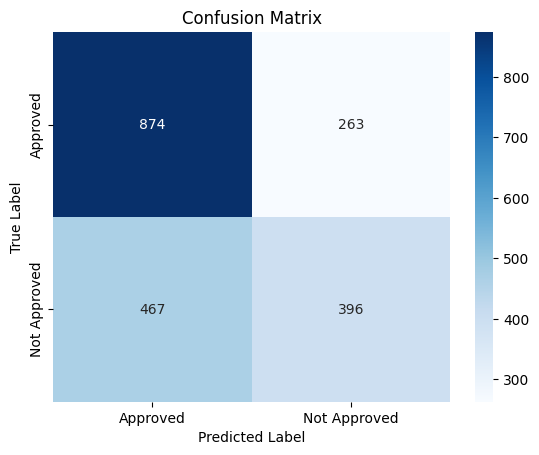

In [100]:
#Plotting the confusion matrix for initial observations
confusion_matrix_A = confusion_matrix(y_test, preds1)
labels = ['Approved', 'Not Approved']
sns.heatmap(confusion_matrix_A, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.figsize = (6, 4)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [101]:
#There are 263 Cases of False Negatives(Positive bias)
#There are 467 Cases of False Positives(Negative bias)

TRAINING A NEURAL NETWORK TO CHECK IF ITS BETTER

In [102]:
#Training a custom neural network(Not optimal results so we will be proceeding with RandomForestClassifier)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5158 - loss: 798.5395 - val_accuracy: 0.5685 - val_loss: 382.1872
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5228 - loss: 178.9436 - val_accuracy: 0.4595 - val_loss: 8.9319
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5183 - loss: 47.2034 - val_accuracy: 0.4905 - val_loss: 31.7595
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5246 - loss: 18.7578 - val_accuracy: 0.5220 - val_loss: 2.9449
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5214 - loss: 7.9063 - val_accuracy: 0.5645 - val_loss: 4.3132
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5164 - loss: 5.1277 - val_accuracy: 0.4345 - val_loss: 2.6785
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5230 - loss: 1.9668 - val_accuracy: 0.5290 - val_loss: 1.8919
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5240 - loss: 4.4407 - val_acc

IBM AI FAIRNESS 360 TOOL FOR BIAS DETECTION

EVALUATION METRICS AND THEIR IDEAL RANGES:

1.  Equal Oppurtunity Difference : Checks if True positive rates are equal across groups(-0.1 to 0.1)
2.  Average Odds Difference : Combines TPR and FPR differences between groups(-0.1 to 0.1)
3. Statistical Parity Difference : Difference in favourable outcomes between groups(-0.1 to 0.1)
4. Disparate Impact : Ratio of outcomes between groups(0.8 to 1.25)
5. Theil Index : Measures inequality in predicted outcomes(-0.1 to 0.1)



Gender Bias Result

In [103]:
#Using The IBM AI Fairness 360 Tool to check for Disparate Impact, Statistical Parity difference, Equal Oppurtunity Difference, Average Odds, Difference, Theil Index
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

dataset2 = BinaryLabelDataset(df=dataset, label_names=['Loan_Approved'], protected_attribute_names=['Gender']) #dataset_true
predicted_df = dataset.copy()


predicted_df['Loan_Approved'] = (model1.predict_proba(X)[:, 1] >= 0.5).astype(int)

dataset_pred = BinaryLabelDataset(
    df=predicted_df,
    label_names=['Loan_Approved'],
    protected_attribute_names=['Gender']
)

classified_metric = ClassificationMetric(
    dataset2, dataset_pred,
    privileged_groups=[{'Gender': 1}],
    unprivileged_groups=[{'Gender': 0}, {'Gender':2}]
)

# Metric for fairness
metric = BinaryLabelDatasetMetric(dataset2, privileged_groups=[{'Gender': 1}], unprivileged_groups=[{'Gender': 0}, {'Gender': 2}])

print("Equal Opportunity Difference:", classified_metric.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric.average_odds_difference())
print("Theil Index:", classified_metric.theil_index())
print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())


Equal Opportunity Difference: -0.06856006500945905
Average Odds Difference: -0.04147123954507209
Theil Index: 0.32142647057785134
Disparate Impact: 0.8751945056373105
Statistical Parity Difference: -0.05753770795971752


Language Proficiency Bias Result

In [104]:
#Using The IBM AI Fairness 360 Tool to check for Disparate Impact, Statistical Parity difference, Equal Oppurtunity Difference, Average Odds, Difference, Theil Index
dataset3 = BinaryLabelDataset(df=dataset, label_names=['Loan_Approved'], protected_attribute_names=['Language_Proficiency']) #dataset_true
predicted_df = dataset.copy()

predicted_df['Loan_Approved'] = (model1.predict_proba(X)[:, 1] >= 0.5).astype(int)

dataset_pred = BinaryLabelDataset(
    df=predicted_df,
    label_names=['Loan_Approved'],
    protected_attribute_names=['Language_Proficiency']
)

classified_metric = ClassificationMetric(
    dataset3, dataset_pred,
    privileged_groups=[{'Language_Proficiency': 0}],
    unprivileged_groups=[{'Language_Proficiency': 1}]
)

# Metric for fairness
metric = BinaryLabelDatasetMetric(dataset3, privileged_groups=[{'Language_Proficiency': 1}], unprivileged_groups=[{'Language_Proficiency': 0}])

print("Equal Opportunity Difference:", classified_metric.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric.average_odds_difference())
print("Theil Index:", classified_metric.theil_index())
print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())


Equal Opportunity Difference: -0.047809393765875285
Average Odds Difference: -0.03520246693732117
Theil Index: 0.32142647057785134
Disparate Impact: 1.1206503468129916
Statistical Parity Difference: 0.04722506872572857


Racial Bias Result

In [105]:
#Using The IBM AI Fairness 360 Tool to check for Disparate Impact, Statistical Parity difference, Equal Oppurtunity Difference, Average Odds, Difference, Theil Index
dataset4 = BinaryLabelDataset(df=dataset, label_names=['Loan_Approved'], protected_attribute_names=['Race']) #dataset_true
predicted_df = dataset.copy()


predicted_df['Loan_Approved'] = (model1.predict_proba(X)[:, 1] >= 0.5).astype(int)

dataset_pred = BinaryLabelDataset(
    df=predicted_df,
    label_names=['Loan_Approved'],
    protected_attribute_names=['Race']
)

classified_metric = ClassificationMetric(
    dataset4, dataset_pred,
    privileged_groups=[{'Race': 0},{'Race':5}],
    unprivileged_groups=[{'Race': 1}, {'Race':2}, {'Race':3}, {'Race':4}]
)

# Metric for fairness
metric = BinaryLabelDatasetMetric(dataset4, privileged_groups=[{'Race': 0},{'Race':5}], unprivileged_groups=[{'Race': 1}, {'Race':2}, {'Race':3}, {'Race':4}])

print("Equal Opportunity Difference:", classified_metric.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric.average_odds_difference())
print("Theil Index:", classified_metric.theil_index())
print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())


Equal Opportunity Difference: -0.04643236074270557
Average Odds Difference: -0.038110572892230854
Theil Index: 0.32142647057785134
Disparate Impact: 0.8389551541259423
Statistical Parity Difference: -0.0735257728059579


Criminal Record Bias Result

In [106]:
#Using The IBM AI Fairness 360 Tool to check for Disparate Impact, Statistical Parity difference, Equal Oppurtunity Difference, Average Odds, Difference, Theil Index
dataset5 = BinaryLabelDataset(df=dataset, label_names=['Loan_Approved'], protected_attribute_names=['Criminal_Record']) #dataset_true
predicted_df = dataset.copy()


predicted_df['Loan_Approved'] = (model1.predict_proba(X)[:, 1] >= 0.5).astype(int)

dataset_pred = BinaryLabelDataset(
    df=predicted_df,
    label_names=['Loan_Approved'],
    protected_attribute_names=['Criminal_Record']
)

classified_metric = ClassificationMetric(
    dataset5, dataset_pred,
    privileged_groups=[{'Criminal_Record': 0}],
    unprivileged_groups=[{'Criminal_Record': 1}]
)

# Metric for fairness
metric = BinaryLabelDatasetMetric(dataset5, privileged_groups=[{'Criminal_Record': 0}], unprivileged_groups=[{'Criminal_Record': 1}])

print("Equal Opportunity Difference:", classified_metric.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric.average_odds_difference())
print("Theil Index:", classified_metric.theil_index())
print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())


Equal Opportunity Difference: -0.07827144191439334
Average Odds Difference: -0.058809344676515204
Theil Index: 0.32142647057785134
Disparate Impact: 0.6995388457698064
Statistical Parity Difference: -0.13282790359628144


Disability Status Bias Result

In [107]:
dataset5 = BinaryLabelDataset(df=dataset, label_names=['Loan_Approved'], protected_attribute_names=['Disability_Status']) #dataset_true
predicted_df = dataset.copy()


predicted_df['Loan_Approved'] = (model1.predict_proba(X)[:, 1] >= 0.5).astype(int)

dataset_pred = BinaryLabelDataset(
    df=predicted_df,
    label_names=['Loan_Approved'],
    protected_attribute_names=['Disability_Status']
)

classified_metric = ClassificationMetric(
    dataset5, dataset_pred,
    privileged_groups=[{'Disability_Status': 0}],
    unprivileged_groups=[{'Disability_Status': 1}]
)

# Metric for fairness
metric = BinaryLabelDatasetMetric(dataset5, privileged_groups=[{'Disability_Status': 0}], unprivileged_groups=[{'Disability_Status': 1}])

print("Equal Opportunity Difference:", classified_metric.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric.average_odds_difference())
print("Theil Index:", classified_metric.theil_index())
print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())


Equal Opportunity Difference: -0.08830071119774341
Average Odds Difference: -0.057764659263551746
Theil Index: 0.32142647057785134
Disparate Impact: 0.7893748788075867
Statistical Parity Difference: -0.09325496619809481


Employment Type Bias Result

In [108]:
dataset6 = BinaryLabelDataset(df=dataset, label_names=['Loan_Approved'], protected_attribute_names=['Employment_Type']) #dataset_true
predicted_df = dataset.copy()


predicted_df['Loan_Approved'] = (model1.predict_proba(X)[:, 1] >= 0.5).astype(int)

dataset_pred = BinaryLabelDataset(
    df=predicted_df,
    label_names=['Loan_Approved'],
    protected_attribute_names=['Employment_Type']
)

classified_metric = ClassificationMetric(
    dataset6, dataset_pred,
    privileged_groups=[{'Employment_Type': 0}],
    unprivileged_groups=[{'Employment_Type': 1},{'Employment_Type': 2},{'Employment_Type': 3},{'Employment_Type': 4}]
)

# Metric for fairness
metric = BinaryLabelDatasetMetric(dataset6, privileged_groups=[{'Employment_Type': 0}], unprivileged_groups=[{'Employment_Type': 1},{'Employment_Type': 2},{'Employment_Type': 3},{'Employment_Type': 4}])

print("Equal Opportunity Difference:", classified_metric.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric.average_odds_difference())
print("Theil Index:", classified_metric.theil_index())
print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())


Equal Opportunity Difference: -0.18727599842397835
Average Odds Difference: -0.16414235636271776
Theil Index: 0.32142647057785134
Disparate Impact: 0.8575051881421952
Statistical Parity Difference: -0.06469504311891455


Age Group Bias Result

In [109]:
dataset7 = BinaryLabelDataset(df=dataset, label_names=['Loan_Approved'], protected_attribute_names=['Age_Group']) #dataset_true
predicted_df = dataset.copy()


predicted_df['Loan_Approved'] = (model1.predict_proba(X)[:, 1] >= 0.5).astype(int)

dataset_pred = BinaryLabelDataset(
    df=predicted_df,
    label_names=['Loan_Approved'],
    protected_attribute_names=['Age_Group']
)

classified_metric = ClassificationMetric(
    dataset7, dataset_pred,
    privileged_groups=[{'Age_Group': 0}],
    unprivileged_groups=[{'Age_Group': 1},{'Age_Group': 2}]
)

# Metric for fairness
metric = BinaryLabelDatasetMetric(dataset7, privileged_groups=[{'Age_Group': 0}], unprivileged_groups=[{'Age_Group': 1},{'Age_Group': 2}])

print("Equal Opportunity Difference:", classified_metric.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric.average_odds_difference())
print("Theil Index:", classified_metric.theil_index())
print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())


Equal Opportunity Difference: -0.05633757112687421
Average Odds Difference: -0.04226729020322073
Theil Index: 0.32142647057785134
Disparate Impact: 0.9369076817208947
Statistical Parity Difference: -0.028015804518321696


Education Level Bias Result

In [110]:
dataset8 = BinaryLabelDataset(df=dataset, label_names=['Loan_Approved'], protected_attribute_names=['Education_Level']) #dataset_true
predicted_df = dataset.copy()


predicted_df['Loan_Approved'] = (model1.predict_proba(X)[:, 1] >= 0.5).astype(int)

dataset_pred = BinaryLabelDataset(
    df=predicted_df,
    label_names=['Loan_Approved'],
    protected_attribute_names=['Education_Level']
)

classified_metric = ClassificationMetric(
    dataset8, dataset_pred,
    privileged_groups=[{'Education_Level': 0}, {'Education_Level': 1}],
    unprivileged_groups=[{'Education_Level': 2},{'Education_Level': 3}]
)

# Metric for fairness
metric = BinaryLabelDatasetMetric(dataset8, privileged_groups=[{'Education_Level': 0}, {'Education_Level': 1}], unprivileged_groups=[{'Education_Level': 2},{'Education_Level': 3}])

print("Equal Opportunity Difference:", classified_metric.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric.average_odds_difference())
print("Theil Index:", classified_metric.theil_index())
print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())


Equal Opportunity Difference: -0.019119440659990605
Average Odds Difference: -0.008636107097528684
Theil Index: 0.32142647057785134
Disparate Impact: 0.9283589515034049
Statistical Parity Difference: -0.03207186473394086


Citizenship Status Bias Result

In [111]:
dataset9 = BinaryLabelDataset(df=dataset, label_names=['Loan_Approved'], protected_attribute_names=['Citizenship_Status']) #dataset_true
predicted_df = dataset.copy()


predicted_df['Loan_Approved'] = (model1.predict_proba(X)[:, 1] >= 0.5).astype(int)

dataset_pred = BinaryLabelDataset(
    df=predicted_df,
    label_names=['Loan_Approved'],
    protected_attribute_names=['Citizenship_Status']
)

classified_metric = ClassificationMetric(
    dataset9, dataset_pred,
    privileged_groups=[{'Citizenship_Status': 0}],
    unprivileged_groups=[{'Citizenship_Status': 1},{'Citizenship_Status': 2}]
)

# Metric for fairness
metric = BinaryLabelDatasetMetric(dataset9, privileged_groups=[{'Citizenship_Status': 0}], unprivileged_groups=[{'Citizenship_Status': 1},{'Citizenship_Status': 2}])

print("Equal Opportunity Difference:", classified_metric.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric.average_odds_difference())
print("Theil Index:", classified_metric.theil_index())
print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())


Equal Opportunity Difference: -0.07339681836531958
Average Odds Difference: -0.04079130518382765
Theil Index: 0.32142647057785134
Disparate Impact: 0.885990286960119
Statistical Parity Difference: -0.05003255999049039


Zip Code Group Bias Result

In [112]:
dataset10 = BinaryLabelDataset(df=dataset, label_names=['Loan_Approved'], protected_attribute_names=['Zip_Code_Group']) #dataset_true
predicted_df = dataset.copy()


predicted_df['Loan_Approved'] = (model1.predict_proba(X)[:, 1] >= 0.5).astype(int)

dataset_pred = BinaryLabelDataset(
    df=predicted_df,
    label_names=['Loan_Approved'],
    protected_attribute_names=['Zip_Code_Group']
)

classified_metric = ClassificationMetric(
    dataset10, dataset_pred,
    privileged_groups=[{'Zip_Code_Group': 0},{'Zip_Code_Group': 3}],
    unprivileged_groups=[{'Zip_Code_Group': 1},{'Zip_Code_Group': 2},{'Zip_Code_Group': 4}]
)

# Metric for fairness
metric = BinaryLabelDatasetMetric(dataset10, privileged_groups=[{'Zip_Code_Group': 0},{'Zip_Code_Group': 3}], unprivileged_groups=[{'Zip_Code_Group': 1},{'Zip_Code_Group': 2},{'Zip_Code_Group': 4}])

print("Equal Opportunity Difference:", classified_metric.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric.average_odds_difference())
print("Theil Index:", classified_metric.theil_index())
print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())


Equal Opportunity Difference: 0.03633177035054547
Average Odds Difference: 0.031103684317958097
Theil Index: 0.32142647057785134
Disparate Impact: 0.9249193977368932
Statistical Parity Difference: -0.033671873949993936


Credit Score Group Bias Result

In [113]:
# Bias between Low and High Credit people

dataset11 = BinaryLabelDataset(df=dataset, label_names=['Loan_Approved'], protected_attribute_names=['Credit_Score_Group']) #dataset_true
predicted_df = dataset.copy()


predicted_df['Loan_Approved'] = (model1.predict_proba(X)[:, 1] >= 0.5).astype(int)

dataset_pred = BinaryLabelDataset(
    df=predicted_df,
    label_names=['Loan_Approved'],
    protected_attribute_names=['Credit_Score_Group']
)

classified_metric = ClassificationMetric(
    dataset11, dataset_pred,
    privileged_groups=[{'Credit_Score_Group': 0},{'Credit_Score_Group': 1}],
    unprivileged_groups=[{'Credit_Score_Group': 3},{'Credit_Score_Group': 4}]
)

# Metric for fairness
metric = BinaryLabelDatasetMetric(dataset11, privileged_groups=[{'Credit_Score_Group': 0},{'Credit_Score_Group': 1}], unprivileged_groups=[{'Credit_Score_Group': 3},{'Credit_Score_Group': 4}])

print("Equal Opportunity Difference:", classified_metric.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric.average_odds_difference())
print("Theil Index:", classified_metric.theil_index())
print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())


Equal Opportunity Difference: -0.642735527116974
Average Odds Difference: -0.5918643724760861
Theil Index: 0.32142647057785134
Disparate Impact: 0.6135663372249437
Statistical Parity Difference: -0.21368972592102148


In [114]:
#This result clearly shows that there is a bias toward people with higher credit scores

Loan Amount Group Bias Result

In [115]:
#Bias between High and Low Loan Amounts
dataset12 = BinaryLabelDataset(df=dataset, label_names=['Loan_Approved'], protected_attribute_names=['Loan_Amount_Group']) #dataset_true
predicted_df = dataset.copy()


predicted_df['Loan_Approved'] = (model1.predict_proba(X)[:, 1] >= 0.5).astype(int)

dataset_pred = BinaryLabelDataset(
    df=predicted_df,
    label_names=['Loan_Approved'],
    protected_attribute_names=['Loan_Amount_Group']
)

classified_metric = ClassificationMetric(
    dataset12, dataset_pred,
    privileged_groups=[{'Loan_Amount_Group': 0}],
    unprivileged_groups=[{'Loan_Amount_Group': 2}, {'Loan_Amount_Group': 1}]
)

# Metric for fairness
metric = BinaryLabelDatasetMetric(dataset12, privileged_groups=[{'Loan_Amount_Group': 0}], unprivileged_groups=[{'Loan_Amount_Group': 1},{'Loan_Amount_Group': 2}])

print("Equal Opportunity Difference:", classified_metric.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric.average_odds_difference())
print("Theil Index:", classified_metric.theil_index())
print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())


Equal Opportunity Difference: -0.0905486114932677
Average Odds Difference: -0.08687378253338501
Theil Index: 0.32142647057785134
Disparate Impact: 0.9028701055535706
Statistical Parity Difference: -0.04541441004150687


In [116]:
#This result shows that there isnt any bias regarding the Loan Amount

Income Group Bias Result

In [117]:
#Bias between High and Low Income groups

dataset13 = BinaryLabelDataset(df=dataset, label_names=['Loan_Approved'], protected_attribute_names=['Income_Group']) #dataset_true
predicted_df = dataset.copy()


predicted_df['Loan_Approved'] = (model1.predict_proba(X)[:, 1] >= 0.5).astype(int)

dataset_pred = BinaryLabelDataset(
    df=predicted_df,
    label_names=['Loan_Approved'],
    protected_attribute_names=['Income_Group']
)

classified_metric = ClassificationMetric(
    dataset13, dataset_pred,
    privileged_groups=[{'Income_Group': 2}],
    unprivileged_groups=[{'Income_Group': 0}, {'Income_Group': 1}]
)

# Metric for fairness
metric = BinaryLabelDatasetMetric(dataset13, privileged_groups=[{'Income_Group': 2}], unprivileged_groups=[{'Income_Group': 1},{'Income_Group': 0}])

print("Equal Opportunity Difference:", classified_metric.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric.average_odds_difference())
print("Theil Index:", classified_metric.theil_index())
print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())


Equal Opportunity Difference: -0.36141171499608893
Average Odds Difference: -0.3530357094188128
Theil Index: 0.32142647057785134
Disparate Impact: 0.7768381266423915
Statistical Parity Difference: -0.11190763093045897


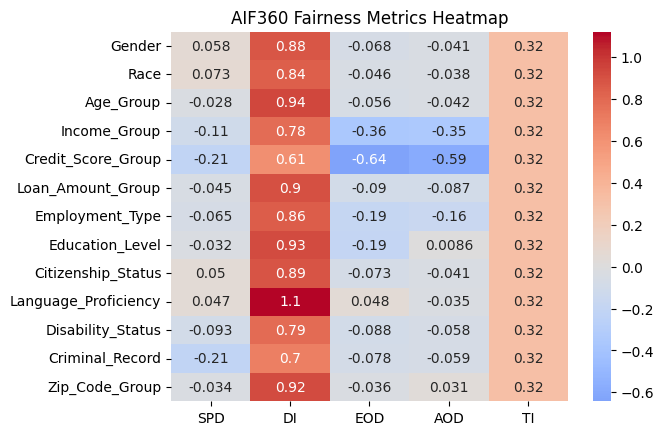

In [118]:
data = {
    'SPD': [0.0575, 0.0735, -0.028, -0.112, -0.214, -0.0454, -0.065, -0.032, 0.05, 0.0472, -0.093, -0.2127, -0.034],
    'DI': [0.875, 0.8389, 0.936, 0.7768, 0.6135, 0.9028, 0.8575, 0.928, 0.886, 1.121, 0.7893, 0.6995, 0.924],
    'EOD': [-0.068, -0.0464, -0.0563, -0.3614, -0.6427, -0.0905, -0.1873, -0.1911, -0.073, 0.048, -0.088, -0.0782, -0.0363],
    'AOD': [-0.0414, -0.0381, -0.042, -0.353, -0.592, -0.0868, -0.1641, 0.0086, -0.041, -0.0352, -0.0577, -0.0588, 0.0311],
    'TI': [0.3214, 0.3214, 0.3214, 0.3214, 0.3214, 0.3214, 0.3214, 0.3214, 0.3214, 0.3214, 0.3214, 0.3214, 0.3214]
}
df = pd.DataFrame(data, index=['Gender', 'Race', 'Age_Group', 'Income_Group', 'Credit_Score_Group', 'Loan_Amount_Group', 'Employment_Type', 'Education_Level', 'Citizenship_Status', 'Language_Proficiency', 'Disability_Status', 'Criminal_Record', 'Zip_Code_Group', ])

sns.heatmap(df, annot=True, cmap='coolwarm', center=0)
plt.title("AIF360 Fairness Metrics Heatmap")
plt.savefig("aif360_metrics_heatmap.png", dpi=300)
plt.show()


SO IN CONCLUSION,
THERE IS A STRONG BIAS TOWARD PEOPLE WITH:
1. NO CRIMINAL RECORD
2. HIGH INCOME
3. HIGH CREDIT SCORE
4. PEOPLE WITH NO DISABILITIES


MILD TO MODERATE BIAS TOWARD:
1. PEOPLE LIVING IN HIGH-INCOME SUBURBAN AND URBAN PROFESSIONAL AREAS
2. PEOPLE WITH SMALL LOAN AMOUNTS
3. PEOPLE WITH FULL TIME JOBS
4. GRADUATES AND BACHELORS

SINCE DATA IMBALANCES CAN SIGNIFICANTLY AFFECT THESE RESULTS, WE CAN CONFIRM BIAS ONLY IN THE GROUPS WHICH HAVE CONSISTENT DATA IN THIS LIST

In [119]:
#Checking for imbalanced data
columns = ['Gender', 'Race', 'Income_Group', 'Credit_Score_Group',
           'Loan_Amount_Group', 'Employment_Type', 'Education_Level',
           'Citizenship_Status','Disability_Status',
           'Criminal_Record']

for col in columns:
  print(dataset[col].value_counts())

Gender
0    4910
1    4887
2     203
Name: count, dtype: int64
Race
5    6008
2    1780
1    1313
0     598
3     207
4      94
Name: count, dtype: int64
Income_Group
1    3938
2    3757
0    2305
Name: count, dtype: int64
Credit_Score_Group
3    2596
4    2329
2    1970
1    1664
0    1441
Name: count, dtype: int64
Loan_Amount_Group
1    4299
2    3620
0    2081
Name: count, dtype: int64
Employment_Type
0    6535
2    1476
3     973
1     809
4     207
Name: count, dtype: int64
Education_Level
0    3448
2    3014
3    1998
1    1540
Name: count, dtype: int64
Citizenship_Status
0    8552
1     991
2     457
Name: count, dtype: int64
Disability_Status
0    8804
1    1196
Name: count, dtype: int64
Criminal_Record
0    9211
1     789
Name: count, dtype: int64


Group-wise Approval Rates

In [120]:
columns = ['Gender', 'Race', 'Age_Group', 'Income_Group', 'Credit_Score_Group',
           'Loan_Amount_Group', 'Employment_Type', 'Education_Level',
           'Citizenship_Status', 'Language_Proficiency', 'Disability_Status',
           'Criminal_Record', 'Zip_Code_Group']

for col in columns:
    print(f"\n--- {col} ---")
    approval_rates = dataset.groupby(col)['Loan_Approved'].mean()
    print(approval_rates)



--- Gender ---
Gender
0    0.406314
1    0.461019
2    0.334975
Name: Loan_Approved, dtype: float64

--- Race ---
Race
0    0.453177
1    0.362529
2    0.385955
3    0.468599
4    0.425532
5    0.456891
Name: Loan_Approved, dtype: float64

--- Age_Group ---
Age_Group
0    0.444045
1    0.419059
2    0.406397
Name: Loan_Approved, dtype: float64

--- Income_Group ---
Income_Group
0    0.293709
1    0.445658
2    0.501464
Name: Loan_Approved, dtype: float64

--- Credit_Score_Group ---
Credit_Score_Group
0    0.570437
1    0.537861
2    0.471066
3    0.380971
4    0.292830
Name: Loan_Approved, dtype: float64

--- Loan_Amount_Group ---
Loan_Amount_Group
0    0.467564
1    0.432891
2    0.409392
Name: Loan_Approved, dtype: float64

--- Employment_Type ---
Employment_Type
0    0.454017
1    0.401731
2    0.403117
3    0.387461
4    0.251208
Name: Loan_Approved, dtype: float64

--- Education_Level ---
Education_Level
0    0.447216
1    0.448701
2    0.395820
3    0.445445
Name: Loan_Approved,

ACCORDING TO THESE RESULTS:

1. Gender: Males have the highest approval rates while Non-Binary people have the lowest
2. Race: White People and Asians have the highest approval rates
3. Age Group: People who are 25-60 years old have a higher approval rate but by a small margin.(Not multiracial(3) as they have much lower value count).
4. Income Group: High Income people have a much higher approval rate showing a clear bias.
5. Credit Score group: High Credit score group have a much higher approval rate showing a clear bias.
6. Loan Amount: Higher Loan Amounts have a lower approval rate but by a small margin
7. Employment Type: Full-time workers have the highest approval rates followed by Gig workers and Part time workers, which indicates that there is a bias against self-employed and unemployed people.
8. Citizenship Status: Citizens have a much higher approval rate compared to visa-holders and permanent residents
9. Language Proficiency: People who are fluent have a much higher approval rate.
10. Disability Status: People with disabilities have a much lower approval rate showing a clear bias.
11. Criminal Record: People with a criminal record have a much lower approval rate showing a clear bias.
12. Zip Code Group: People from High-Income suburbs, Urban professional and rural have a higher approval rate and historically redlined areas have a significantly lower approval rate.

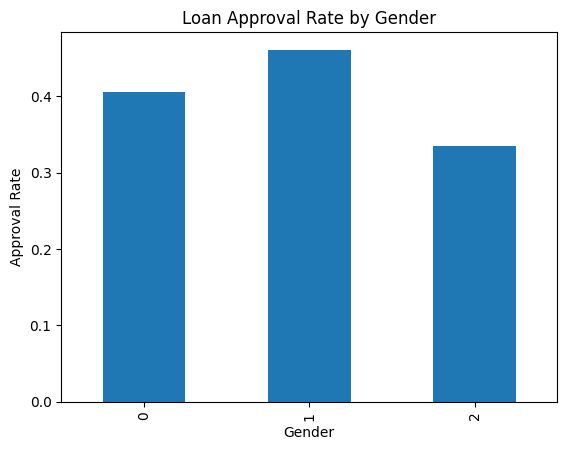

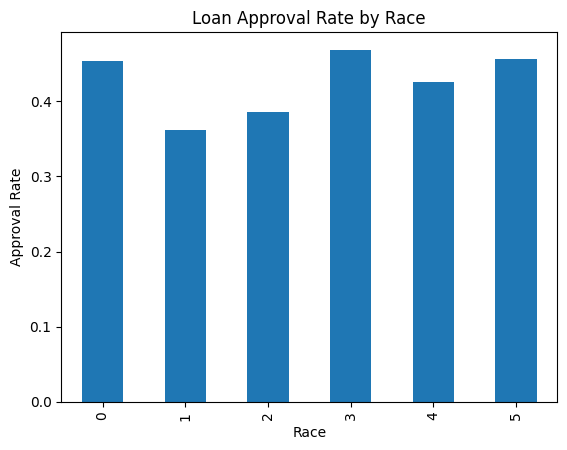

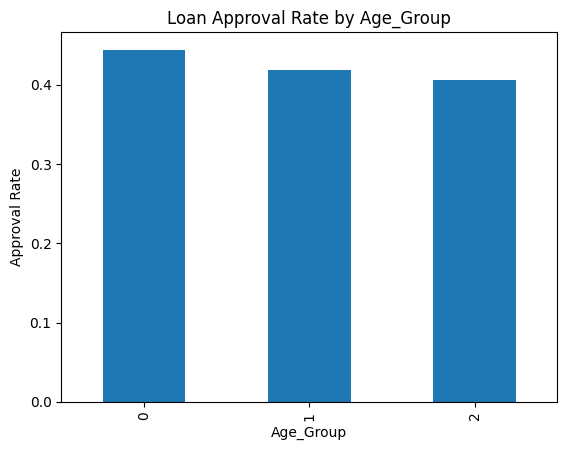

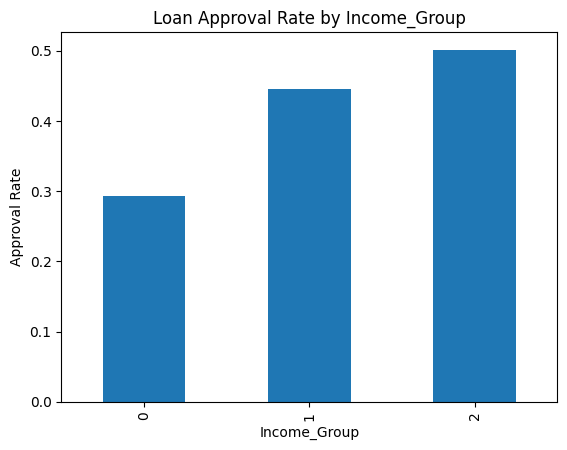

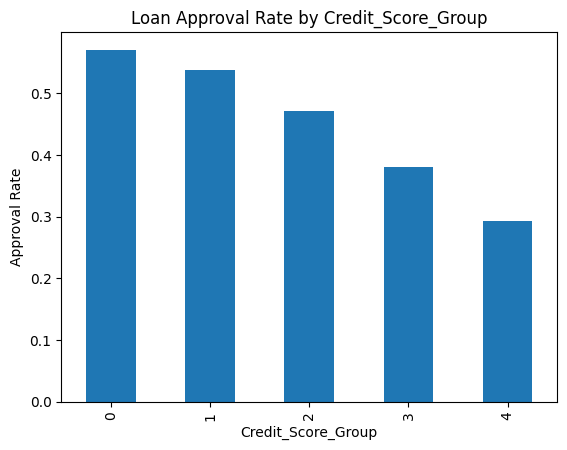

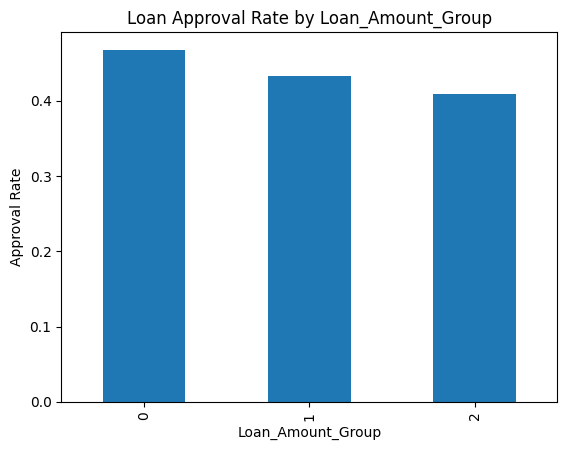

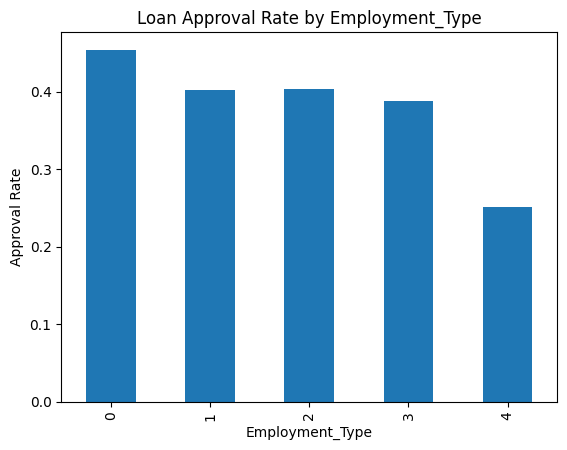

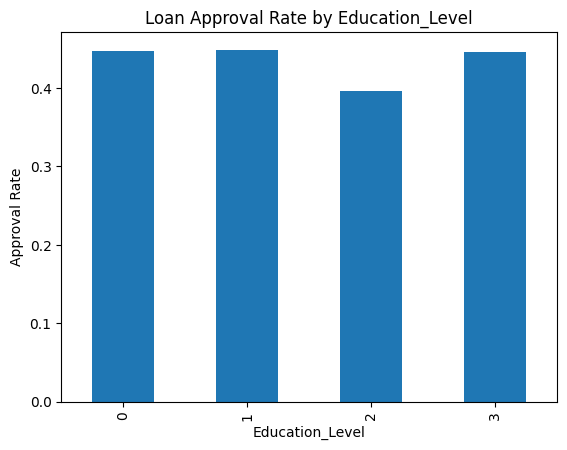

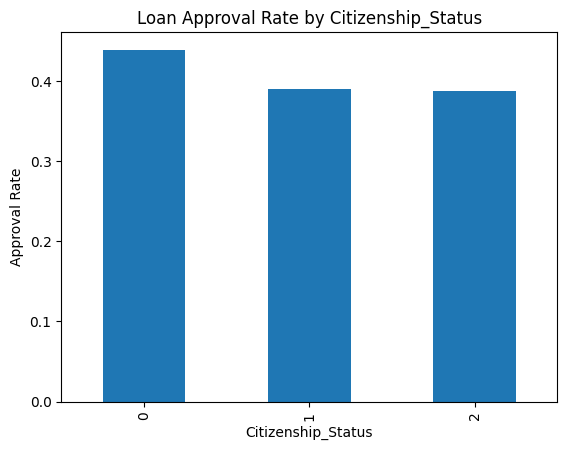

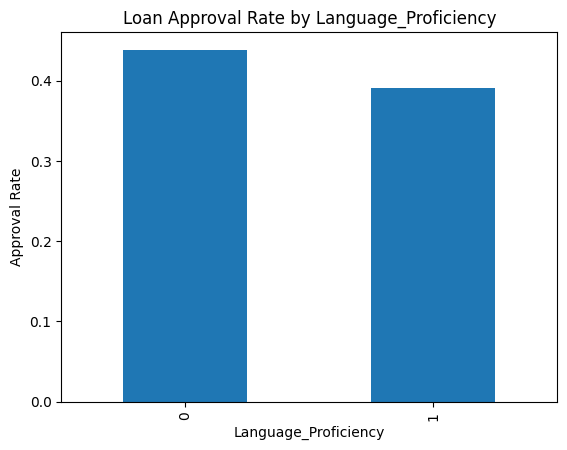

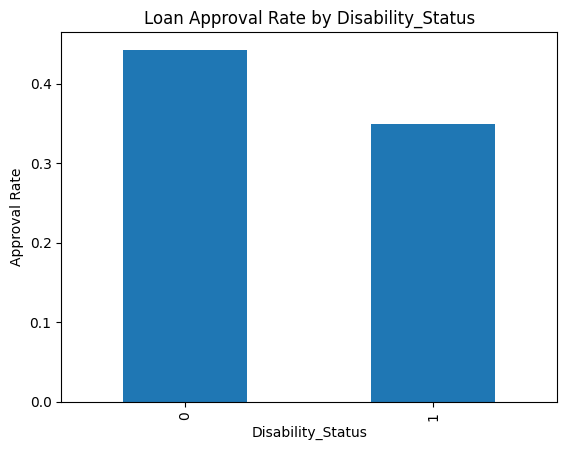

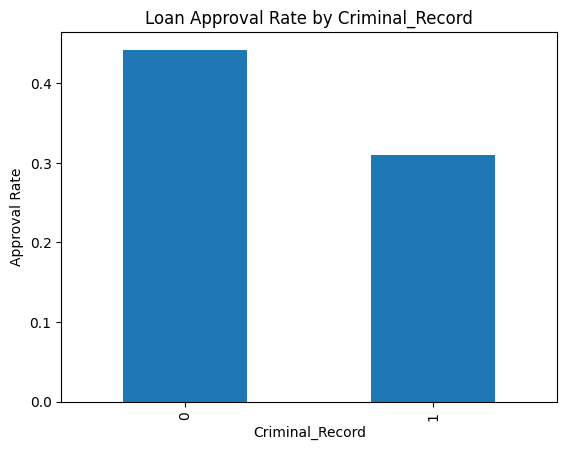

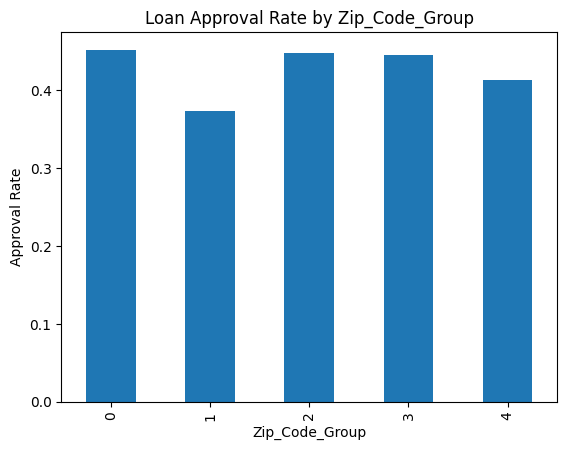

In [121]:
#Visualizing the approval rates
for col in columns:
    ar = dataset.groupby(col)['Loan_Approved'].mean()
    ar.plot(kind='bar', title=f'Loan Approval Rate by {col}', ylabel='Approval Rate')
    plt.savefig(f'Approval_rates_{col}.png', dpi=300)
    plt.show()


**Intersection Fairness**

BASED ON RESEARCH WE ARE MOST LIKELY TO FIND BIAS IN THE FOLLOWING COMBINATIONS:
1. RACE+GENDER
2. RACE+INCOME_GROUP
3. GENDER+EMPLOYMENT TYPE
4. RACE+ZIP CODE GROUP
5. CITIZENSHIP STATUS + EMPLOYMENT TYPE
6. DISABILITY STATUS + INCOME GROUP
7. AGE GROUP + CREDIT SCORE GROUP

SO WE WILL BE VISUALOSING THESE ONE BY ONE USING SEABORN

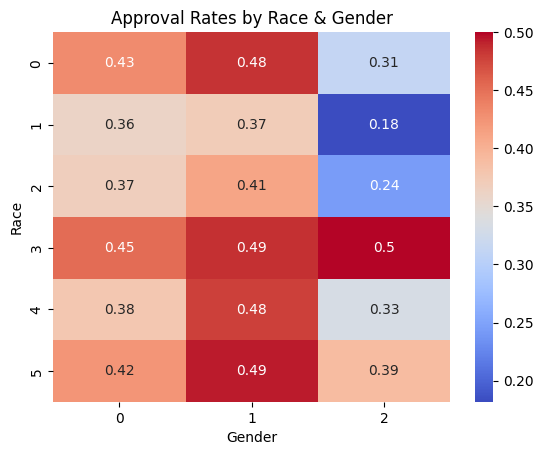

In [122]:
#RACE+GENDER
grouped_data = dataset.groupby(['Race', 'Gender'])['Loan_Approved'].mean().reset_index()
pivot = grouped_data.pivot(index='Race', columns='Gender', values='Loan_Approved')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Approval Rates by Race & Gender")
plt.show()

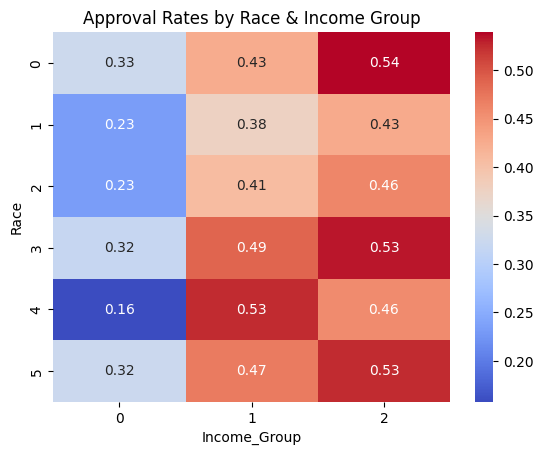

In [123]:
#RACE+ INCOME GROUP
grouped_data = dataset.groupby(['Race', 'Income_Group'])['Loan_Approved'].mean().reset_index()
pivot = grouped_data.pivot(index='Race', columns='Income_Group', values='Loan_Approved')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Approval Rates by Race & Income Group")
plt.show()

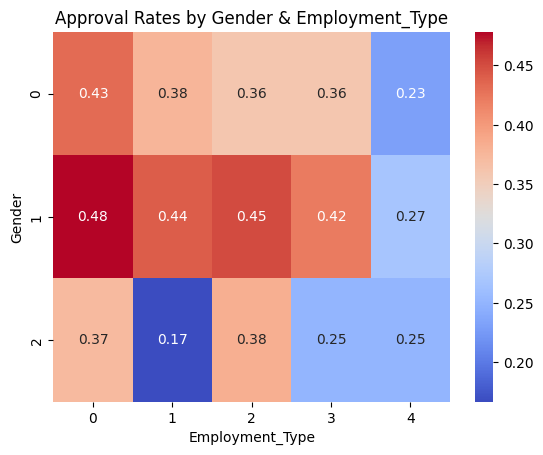

In [124]:
#GENDER + EMPLOYMENT TYPE
grouped_data = dataset.groupby(['Gender', 'Employment_Type'])['Loan_Approved'].mean().reset_index()
pivot = grouped_data.pivot(index='Gender', columns='Employment_Type', values='Loan_Approved')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Approval Rates by Gender & Employment_Type")
plt.show()

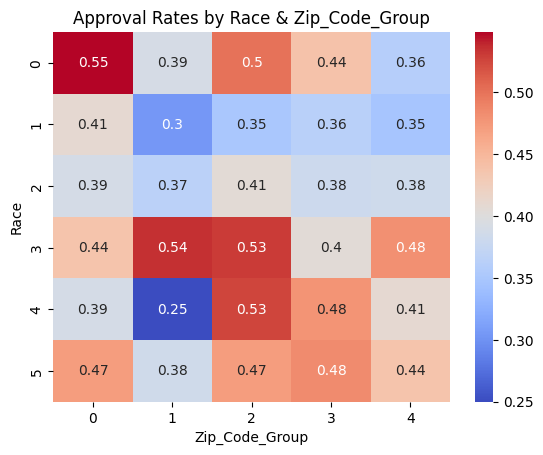

In [125]:
#RACE + ZIP CODE GROUP
grouped_data = dataset.groupby(['Race', 'Zip_Code_Group'])['Loan_Approved'].mean().reset_index()
pivot = grouped_data.pivot(index='Race', columns='Zip_Code_Group', values='Loan_Approved')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Approval Rates by Race & Zip_Code_Group")
plt.show()

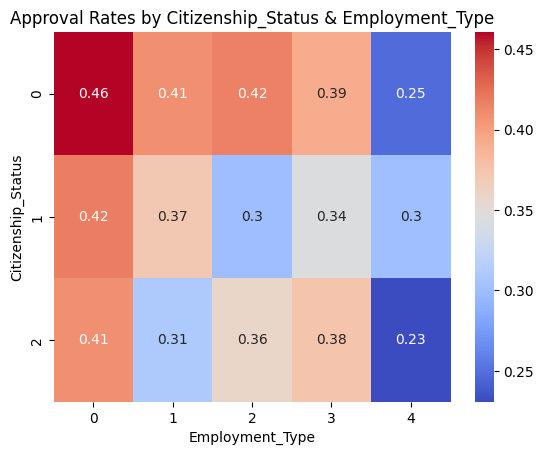

In [126]:
#CITIZENSHIP STATUS + EMPLOYMENT TYPE
grouped_data = dataset.groupby(['Citizenship_Status', 'Employment_Type'])['Loan_Approved'].mean().reset_index()
pivot = grouped_data.pivot(index='Citizenship_Status', columns='Employment_Type', values='Loan_Approved')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Approval Rates by Citizenship_Status & Employment_Type")
plt.show()

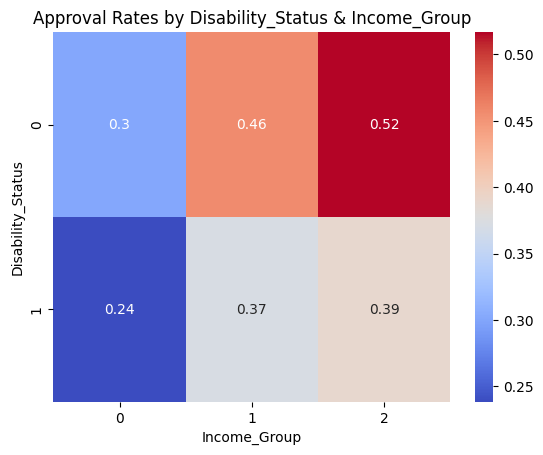

In [127]:
#DISABILITY STATUS + INCOME GROUP
grouped_data = dataset.groupby(['Disability_Status', 'Income_Group'])['Loan_Approved'].mean().reset_index()
pivot = grouped_data.pivot(index='Disability_Status', columns='Income_Group', values='Loan_Approved')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Approval Rates by Disability_Status & Income_Group")
plt.show()

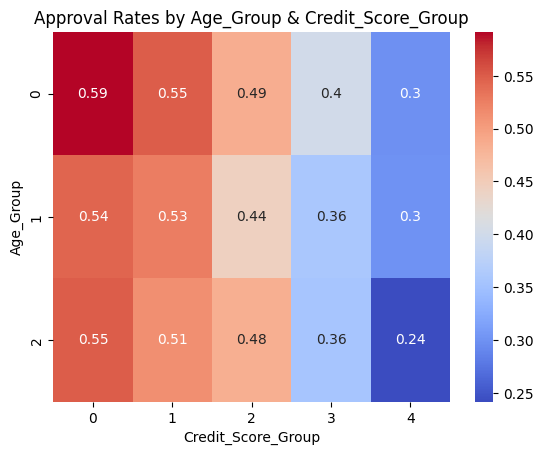

In [128]:
#AGE GROUP + CREDIT SCORE GROUP
grouped_data = dataset.groupby(['Age_Group', 'Credit_Score_Group'])['Loan_Approved'].mean().reset_index()
pivot = grouped_data.pivot(index='Age_Group', columns='Credit_Score_Group', values='Loan_Approved')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Approval Rates by Age_Group & Credit_Score_Group")
plt.show()

FROM THESE INTERSECTION FAIRNESS HEATMAPS WE CAN CONCLUDE THAT THE GROUPS WHICH ARE BEING FAVOURED ARE:
1. Citizens with top-tier jobs get best outcomes.
2. Older People with best credit get highest approvals.
3. Disabled + low income = highest approval. Suggests support policy.
4. Non-Binary people with mid employment — best treated group.
5. Black + Non-Binary = highest approval.
6. Native American + low income = highest approval — possible bias or priority policy.

Visual Explanation(SHAP, LIME)

In [129]:
!pip install shap

WHAT THE BELOW CODE HELPS US VISUALIZE

1. Bar: Overall feature importance
2. Force Plot: Explaining a single decision
3. Beeswarm(Summary Plot): Global feature influence
4. Scatter: plots all the above shap features on the graph

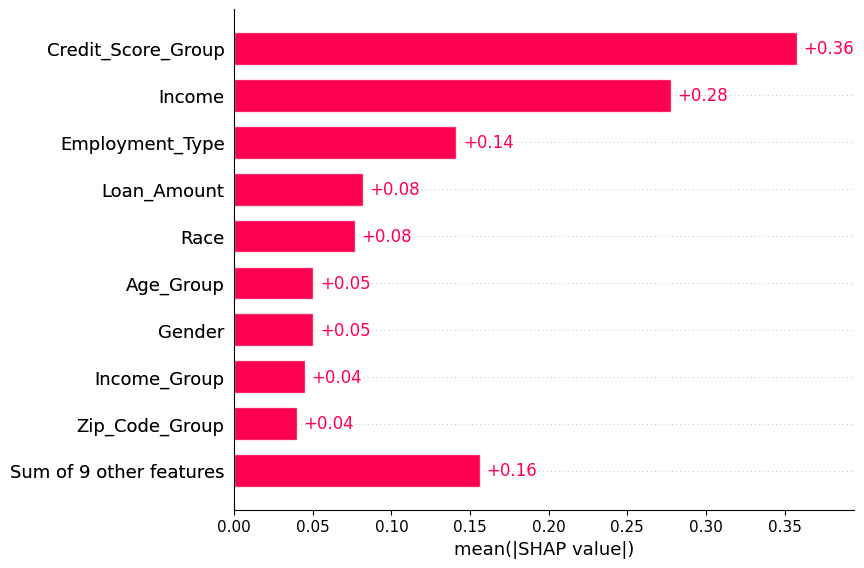

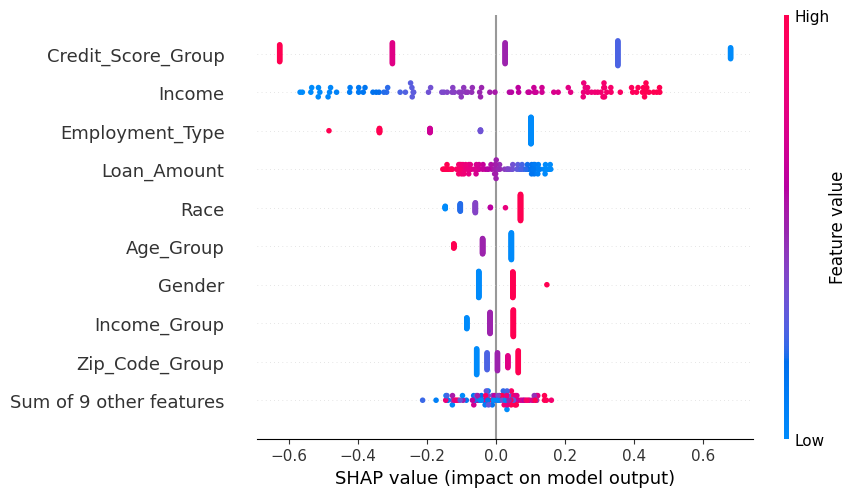

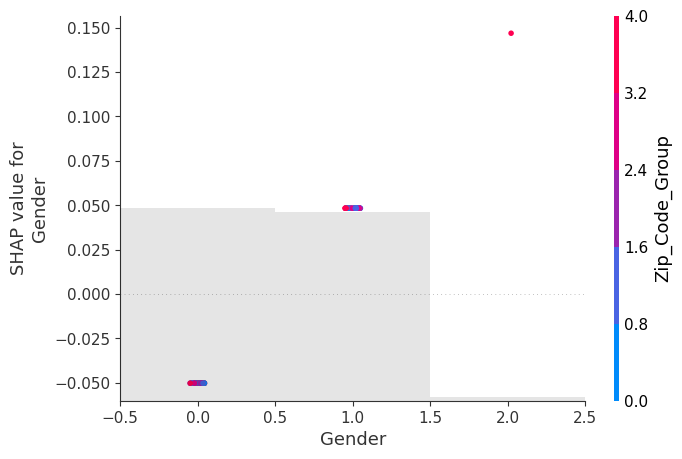

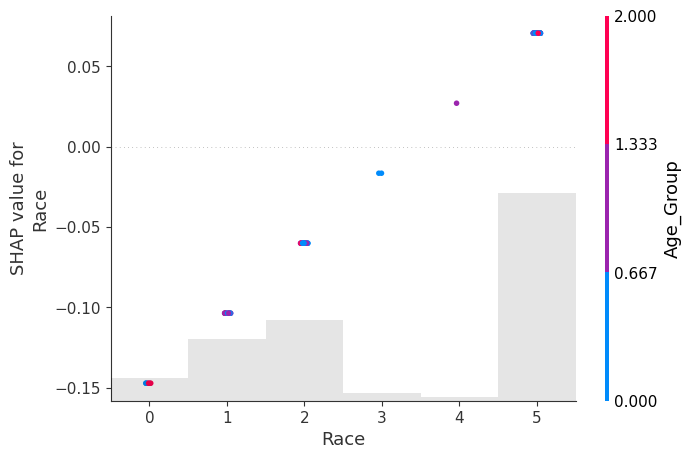

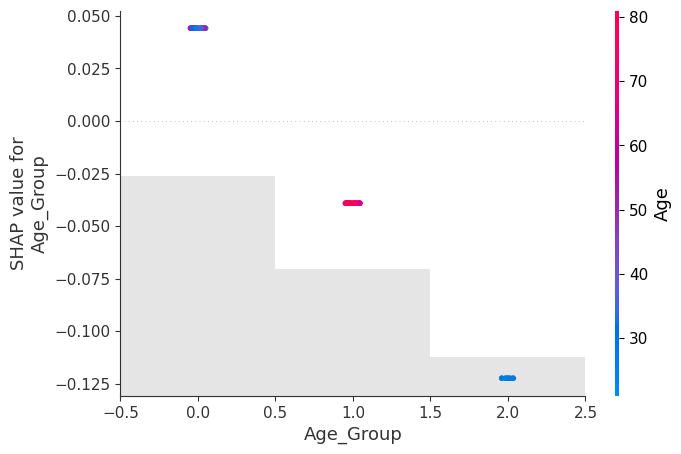

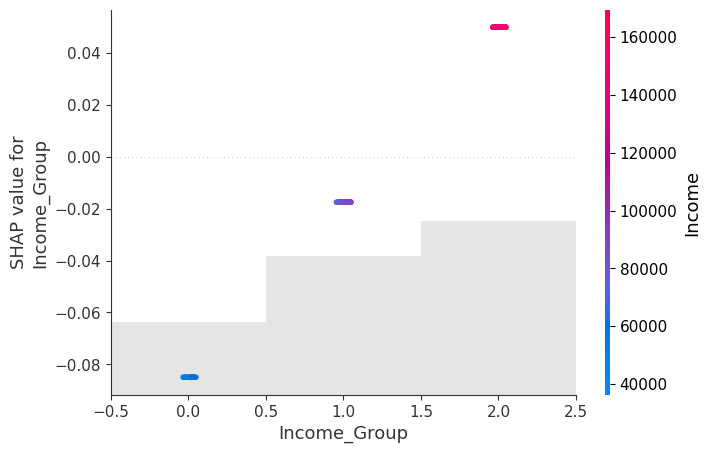

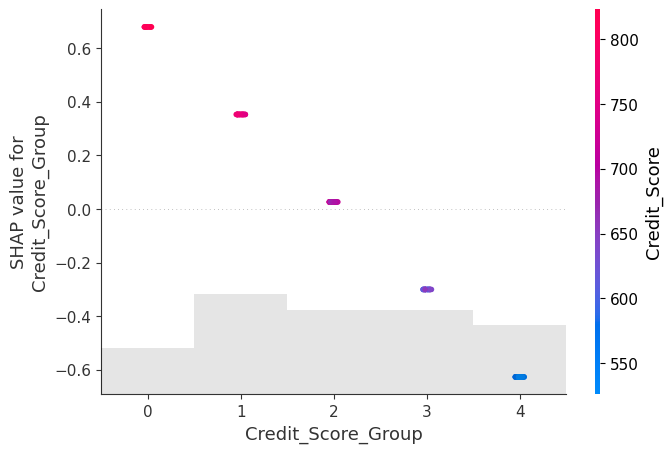

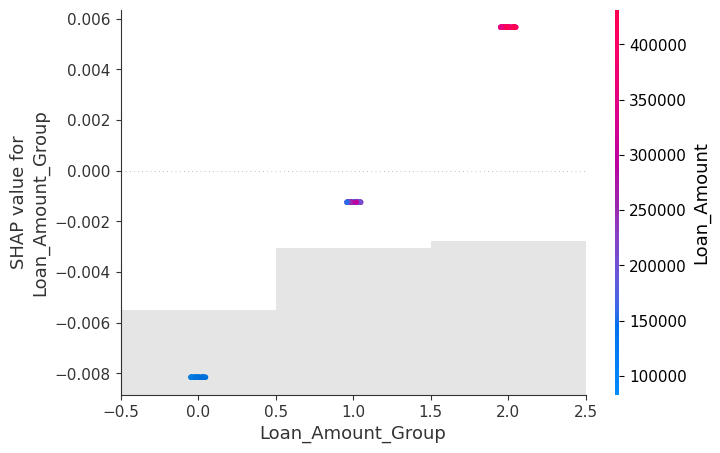

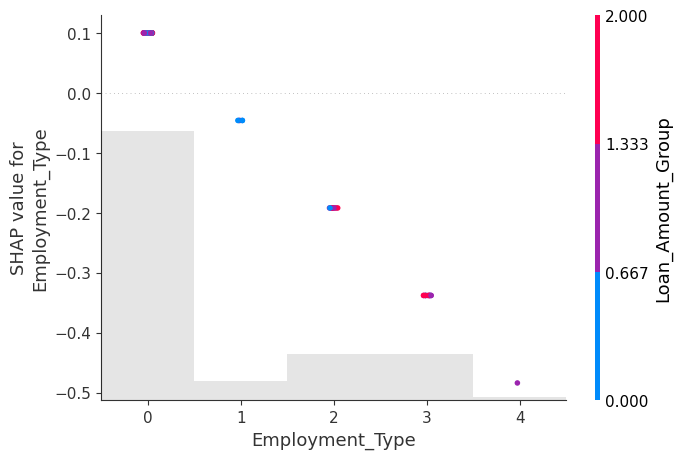

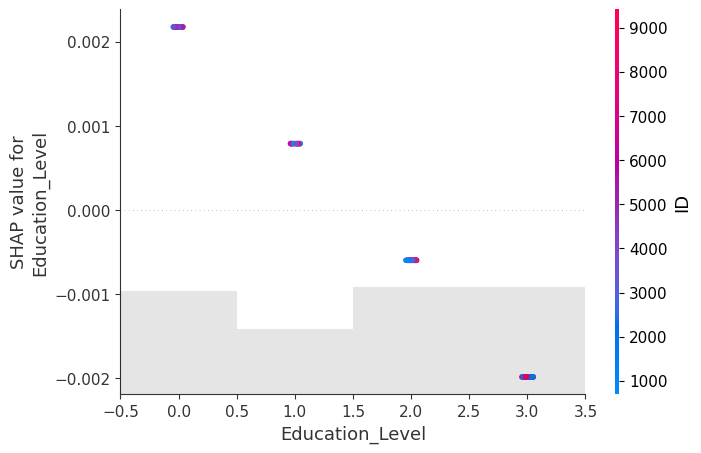

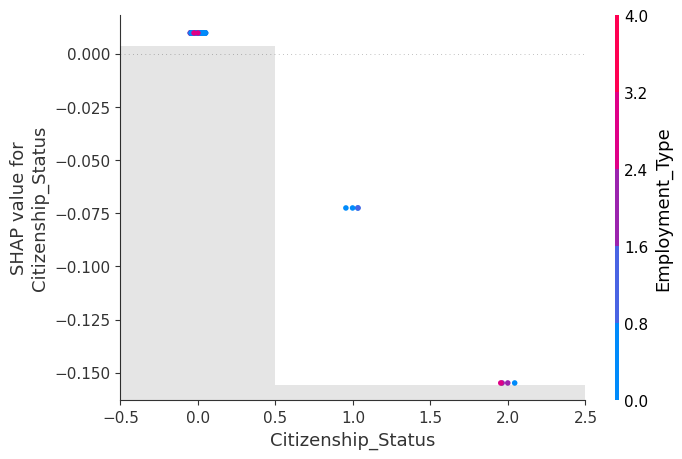

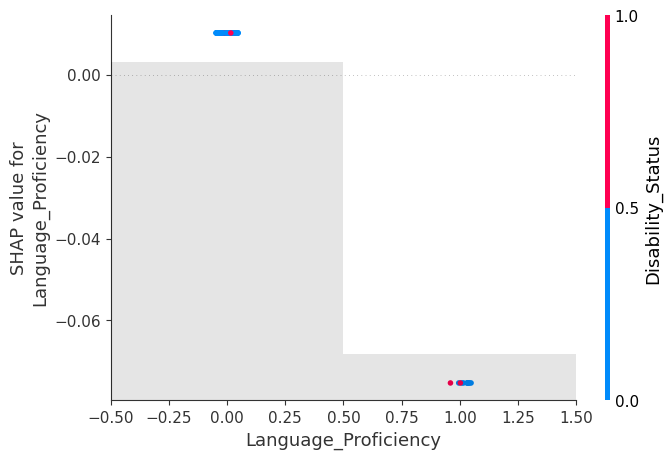

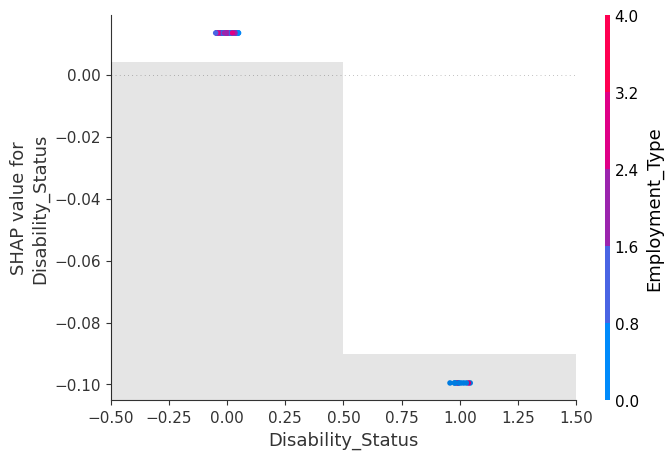

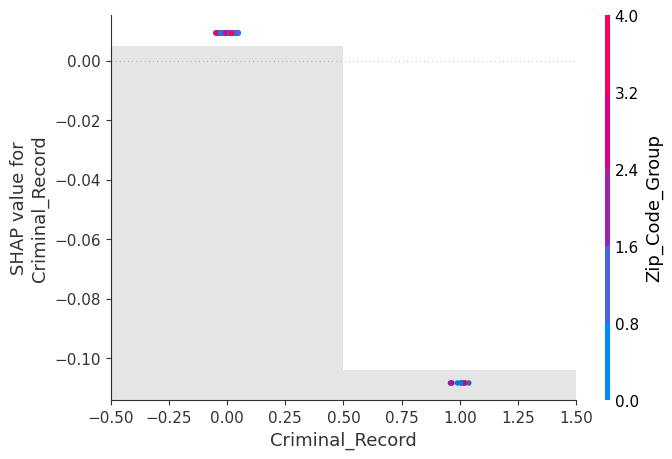

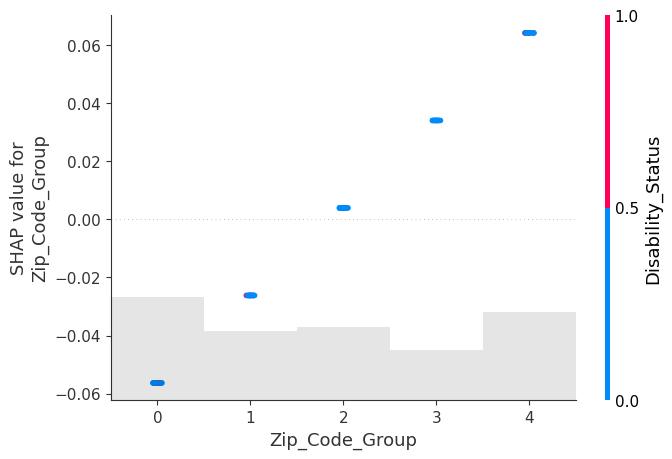

In [130]:
#SHAP values for all the columns
import shap
import matplotlib.pyplot as plt
columns = ['Gender', 'Race', 'Age_Group', 'Income_Group', 'Credit_Score_Group',
           'Loan_Amount_Group', 'Employment_Type', 'Education_Level',
           'Citizenship_Status', 'Language_Proficiency', 'Disability_Status',
           'Criminal_Record', 'Zip_Code_Group']

X_sample = X_test.sample(100, random_state=42)
explainer = shap.Explainer(model1, X_sample)
shap_values = explainer(X_sample)

shap.plots.bar(shap_values)
shap.plots.beeswarm(shap_values)
shap.initjs()
shap.force_plot(
    base_value=shap_values.base_values[0],
    shap_values=shap_values.values[0],
    features=X_test.iloc[0],
    feature_names=X_test.columns
)
for col in columns:
  shap.plots.scatter(shap_values[:, col], color=shap_values)

In [131]:
!pip install lime

In [132]:
from lime.lime_tabular import LimeTabularExplainer

In [133]:
explainer = LimeTabularExplainer(training_data = X_train.values, feature_names=X_train.columns, class_names=['Not Approved', 'Approved'], mode='classification')

In [134]:
i=5
exp = explainer.explain_instance(data_row=X_test.iloc[i].values,predict_fn=model1.predict_proba)
exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


From the above plots we can conclude:
Likely positive influences (red):
  1. High income

  2. No criminal record

  3. High language proficiency

  4. High income group

Likely negative influences (blue):
  1. High loan amount

  2. Possibly young age

  3. Possibly Gender, depending on model bias

MODEL PREDICTIONS ON TEST DATASET

In [135]:
test_dataset = pd.read_csv('/content/test.csv')
test_dataset.head()

ID  Gender   Race  Age Age_Group  Income  Credit_Score  Loan_Amount  \
0   589    Male  White   30     25-60  143019           544       157852   
1  1580    Male  White   38     25-60   83581           595       170075   
2  5950  Female  White   19  Under 25  133965           577        53473   
3   475  Female  White   66   Over 60   88912           643       229985   
4  1079  Female  White   72   Over 60   59713           525       390167   

  Employment_Type Education_Level Citizenship_Status Language_Proficiency  \
0       Full-time     High School            Citizen              Limited   
1       Full-time    Some College            Citizen               Fluent   
2       Full-time      Bachelor's            Citizen              Limited   
3       Part-time     High School            Citizen              Limited   
4             Gig     High School            Citizen               Fluent   

  Disability_Status Criminal_Record        Zip_Code_Group  
0                No              No    Urban Professional  
1                No              No   Working Class Urban  
2                No              No                 Rural  
3                No              No  High-income Suburban  
4                No              No   Working Class Urban

In [136]:
#Encoding all the columns for training the model
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Race', 'Age_Group', 'Employment_Type', 'Education_Level', 'Citizenship_Status', 'Zip_Code_Group', 'Language_Proficiency', 'Disability_Status', 'Criminal_Record', 'Gender']
for column in columns_to_encode:
  le = LabelEncoder()
  test_dataset[column] = le.fit_transform(test_dataset[column])


In [137]:
#Creating a New Feature(Income_group) to evaluate financial biases
#0-Low, 1-Medium, 2-High
def income_group(income):
    if income < 60000:
        return 0
    elif income < 120000:
        return 1
    else:
        return 2

test_dataset['Income_Group'] = test_dataset['Income'].apply(income_group)

In [138]:
# Remove the column and save it temporarily
income_group_col = test_dataset.pop('Income_Group')

# Re-insert it at the desired index
test_dataset.insert(loc=dataset.columns.get_loc('Income') + 1, column='Income_Group', value=income_group_col)


In [139]:
#High - 2, Medium - 1, Low - 0

def loan_group(amt):
    if amt <= 135000:
        return 0
    elif amt <= 310000:
        return 1
    else:
        return 2

test_dataset['Loan_Amount_Group'] = test_dataset['Loan_Amount'].apply(loan_group)

In [140]:
# 0-Excellent, 1-Very Good, 2-Good, 3-Fair, 4-Poor
def credit_score_category(c_score):
  if c_score >= 800:
    return 0
  elif c_score >=740:
    return 1
  elif c_score >= 670:
    return 2
  elif c_score >= 580:
    return 3
  else:
    return 4

test_dataset['Credit_Score_Group'] = test_dataset['Credit_Score'].apply(credit_score_category)

In [141]:
new_order = ['ID', 'Gender', 'Race', 'Age', 'Age_Group', 'Income', 'Income_Group', 'Credit_Score', 'Credit_Score_Group', 'Loan_Amount', 'Loan_Amount_Group', 'Employment_Type', 'Education_Level', 'Citizenship_Status', 'Language_Proficiency', 'Disability_Status', 'Criminal_Record', 'Zip_Code_Group']
test_dataset_reordered = test_dataset[new_order]

In [142]:
test_dataset_reordered.head()

ID  Gender  Race  Age  Age_Group  Income  Income_Group  Credit_Score  \
0   589       1     5   30          0  143019             2           544   
1  1580       1     5   38          0   83581             1           595   
2  5950       0     5   19          2  133965             2           577   
3   475       0     5   66          1   88912             1           643   
4  1079       0     5   72          1   59713             0           525   

   Credit_Score_Group  Loan_Amount  Loan_Amount_Group  Employment_Type  \
0                   4       157852                  1                0   
1                   3       170075                  1                0   
2                   4        53473                  0                0   
3                   3       229985                  1                2   
4                   4       390167                  2                1   

   Education_Level  Citizenship_Status  Language_Proficiency  \
0                2                   0                     1   
1                3                   0                     0   
2                0                   0                     1   
3                2                   0                     1   
4                2                   0                     0   

   Disability_Status  Criminal_Record  Zip_Code_Group  
0                  0                0               3  
1                  0                0               4  
2                  0                0               2  
3                  0                0               0  
4                  0                0               4

In [143]:
test_preds = model1.predict(test_dataset_reordered)

In [144]:
test_preds

array([0, 0, 0, ..., 0, 0, 1])

In [145]:
test_dataset_reordered['Loan_Approved'] = test_preds

/tmp/ipython-input-145-163719718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_reordered['Loan_Approved'] = test_preds


In [146]:
test_dataset_reordered.head()

ID  Gender  Race  Age  Age_Group  Income  Income_Group  Credit_Score  \
0   589       1     5   30          0  143019             2           544   
1  1580       1     5   38          0   83581             1           595   
2  5950       0     5   19          2  133965             2           577   
3   475       0     5   66          1   88912             1           643   
4  1079       0     5   72          1   59713             0           525   

   Credit_Score_Group  Loan_Amount  Loan_Amount_Group  Employment_Type  \
0                   4       157852                  1                0   
1                   3       170075                  1                0   
2                   4        53473                  0                0   
3                   3       229985                  1                2   
4                   4       390167                  2                1   

   Education_Level  Citizenship_Status  Language_Proficiency  \
0                2                   0                     1   
1                3                   0                     0   
2                0                   0                     1   
3                2                   0                     1   
4                2                   0                     0   

   Disability_Status  Criminal_Record  Zip_Code_Group  Loan_Approved  
0                  0                0               3              0  
1                  0                0               4              0  
2                  0                0               2              0  
3                  0                0               0              0  
4                  0                0               4              0

In [147]:
submission = test_dataset_reordered[['ID', 'Loan_Approved']]
submission.head(25)

ID  Loan_Approved
0    589              0
1   1580              0
2   5950              0
3    475              0
4   1079              0
5   3763              0
6   6402              0
7   6418              0
8   6585              0
9   6837              0
10  4748              0
11  5343              1
12  9539              0
13  9274              0
14  4879              0
15  1101              1
16  5545              0
17  3239              0
18   845              0
19  6995              1
20  2162              0
21  1596              0
22  8474              0
23  4435              0
24  7158              0

In [148]:
submission.to_csv("/content/submission.csv", index=False)

In [149]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>